# Setup

In [1]:
import matplotlib
import os
import pandas as pd

%matplotlib inline

<hr>

In [2]:
with open('../package_data/index.tsv', 'r') as f:
    lines = [line.split('\t') for line in f.readlines()]
    
df = pd.DataFrame(lines, columns=['Index', 'Author', 'Name', 'Url', 'Verrsion', 'Description'])
df[:2]

,Index,Author,Name,Url,Verrsion,Description
0,0,elm,browser,https://package.elm-lang.org/packages/elm/brow...,1.0.2,"Run Elm in browsers, with access to browser hi..."
1,1,elm,bytes,https://package.elm-lang.org/packages/elm/byte...,1.0.8,Work with sequences of bytes (a.k.a. ArrayBuff...


<hr>

# Packages

In [3]:
os.listdir(f'../package_data/1450')

['About.html', 'README.html', 'Bytes.Parser.html']

In [4]:
dirs = [dir for dir in os.listdir('../package_data/') 
        if 'index' not in dir]

missing = 0
for dir in dirs:
    if len(os.listdir(f'../package_data/{dir}')) <= 2:
        missing += 1
        
missing_pct = missing / len(df)
        
print(f'Of {len(df)} total packages, {missing} ({missing_pct:.1%}) are missing source code')

Of 1457 total packages, 48 (3.3%) are missing source code


<hr>

# Authors

In [5]:
print(f'There are {df["Author"].nunique()} authors.')

There are 623 authors.


**Histogram of # of Packages per Author**

array([[<AxesSubplot:title={'center':'Count'}>]], dtype=object)

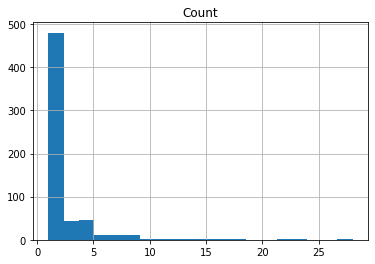

In [6]:
df_authors = df[['Index', 'Author']].groupby('Author').count()
df_authors.rename(columns={'Index':'Count'}, inplace=True)
df_authors.hist(bins=20)

**Top 10 Authors**

In [7]:

df_authors.sort_values(by='Count', ascending=False)[:10]

,Count
Author,
the-sett,28
billstclair,23
NoRedInk,23
jfmengels,22
jxxcarlson,18
arowM,18
elm-community,16
ianmackenzie,16
elm,15


In [11]:
df_authors.sort_values(by='Count', ascending=False)[:40].sum()

Count    466
dtype: int64

In [15]:
print(f'Top 40 authors account for {466 / len(df):.1%} of packages')

Top 40 authors account for 32.0% of packages
